#**Data Preprocessing for Relive Review App**
A continuation from the review scraping in `02-relive-reviews-exploratory-data-analysis.ipynb`, which you can access [here](https://colab.research.google.com/drive/13gQ-nq-3YSepNPNFRH_glIT9woiHBMeZ?usp=sharing)

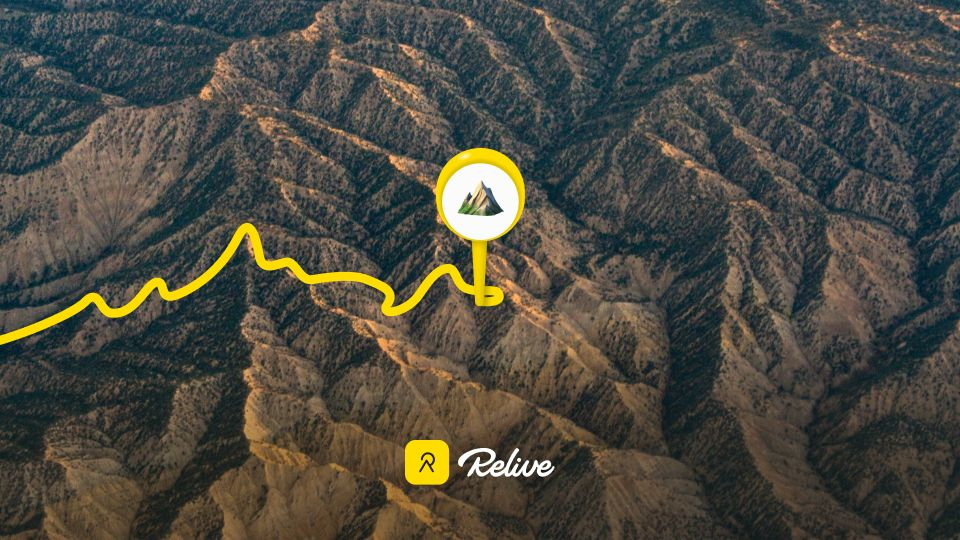
---



##Instalasi dan impor library


In [1]:
!pip install textblob
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns

# Apply the seaborn style before creating plots
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans']

## Upload dataset file

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_reliverev = pd.read_csv('/content/drive/My Drive/Data/df_reliverev')
df_reliverev.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,71f966cc-b905-4d92-9662-267512516332,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Good app, but I wish for upgrade in UI and som...",4,0,5.57.0,2025-03-11 11:58:45,NaN,NaN,5.57.0
1,7554edbe-d8bc-4a4a-aaa7-3d9c7112a493,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,accurate details,4,0,5.57.0,2025-03-11 00:24:19,NaN,NaN,5.57.0
2,2eaa87c0-38d1-4a23-a7c7-81a74dda90ca,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Paid for this last year at 50% off, its just r...",2,0,5.57.0,2025-03-10 14:14:45,NaN,NaN,5.57.0
3,bfecffd5-233c-48c0-8b70-7fc1cf66912a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"It's a very good application for me, so try it...",5,0,5.57.0,2025-03-10 12:45:46,NaN,NaN,5.57.0
4,d238c089-b972-4155-abdb-b26a5f285134,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Ohsem,5,0,5.57.0,2025-03-09 05:45:56,NaN,NaN,5.57.0


In [5]:
df_reliverev

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,71f966cc-b905-4d92-9662-267512516332,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Good app, but I wish for upgrade in UI and som...",4,0,5.57.0,2025-03-11 11:58:45,NaN,NaN,5.57.0
1,7554edbe-d8bc-4a4a-aaa7-3d9c7112a493,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,accurate details,4,0,5.57.0,2025-03-11 00:24:19,NaN,NaN,5.57.0
2,2eaa87c0-38d1-4a23-a7c7-81a74dda90ca,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Paid for this last year at 50% off, its just r...",2,0,5.57.0,2025-03-10 14:14:45,NaN,NaN,5.57.0
3,bfecffd5-233c-48c0-8b70-7fc1cf66912a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"It's a very good application for me, so try it...",5,0,5.57.0,2025-03-10 12:45:46,NaN,NaN,5.57.0
4,d238c089-b972-4155-abdb-b26a5f285134,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Ohsem,5,0,5.57.0,2025-03-09 05:45:56,NaN,NaN,5.57.0
...,...,...,...,...,...,...,...,...,...,...,...
21616,bf98d323-2b31-4df8-a3f7-446e0d00748e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Awesome.. has all my rides,5,0,1.0,2017-03-26 05:55:08,NaN,NaN,1.0
21617,903af083-7b12-4708-bc25-31c779b4ff6d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"So far, very good.",5,0,1.0,2017-03-26 01:39:03,NaN,NaN,1.0
21618,44ed2bef-eca5-4b36-93e2-dde154698632,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Love the app. Fantastic....,5,0,1.0,2017-03-25 08:24:47,NaN,NaN,1.0
21619,a77422c6-b008-484f-a1a8-5a816fbd9397,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Brilliant, just what was needed adding the app...",5,1,1.0,2017-03-23 18:20:09,NaN,NaN,1.0


##Check Data Type Information

In [6]:
df_reliverev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21621 entries, 0 to 21620
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              21621 non-null  object
 1   userName              21621 non-null  object
 2   userImage             21621 non-null  object
 3   content               21619 non-null  object
 4   score                 21621 non-null  int64 
 5   thumbsUpCount         21621 non-null  int64 
 6   reviewCreatedVersion  20363 non-null  object
 7   at                    21621 non-null  object
 8   replyContent          653 non-null    object
 9   repliedAt             653 non-null    object
 10  appVersion            20363 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.8+ MB


##Turn into relevant data type

In [7]:
# Converting 'at' column to datetime objects into datetime
df_reliverev['at'] = pd.to_datetime(df_reliverev['at'])
df_reliverev.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21621 entries, 0 to 21620
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              21621 non-null  object        
 1   userName              21621 non-null  object        
 2   userImage             21621 non-null  object        
 3   content               21619 non-null  object        
 4   score                 21621 non-null  int64         
 5   thumbsUpCount         21621 non-null  int64         
 6   reviewCreatedVersion  20363 non-null  object        
 7   at                    21621 non-null  datetime64[ns]
 8   replyContent          653 non-null    object        
 9   repliedAt             653 non-null    object        
 10  appVersion            20363 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 1.8+ MB


##Remove Unnecessary and NaN Columns

In [18]:
df_reliverev.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
21616,bf98d323-2b31-4df8-a3f7-446e0d00748e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Awesome.. has all my rides,5,0,1.0,2017-03-26 05:55:08,1.0
21617,903af083-7b12-4708-bc25-31c779b4ff6d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"So far, very good.",5,0,1.0,2017-03-26 01:39:03,1.0
21618,44ed2bef-eca5-4b36-93e2-dde154698632,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Love the app. Fantastic....,5,0,1.0,2017-03-25 08:24:47,1.0
21619,a77422c6-b008-484f-a1a8-5a816fbd9397,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Brilliant, just what was needed adding the app...",5,1,1.0,2017-03-23 18:20:09,1.0
21620,cbc0006c-a2c2-49f3-8dff-974061c784d4,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It's amazing 😃,5,0,NaN,2017-03-23 15:06:19,NaN


In [15]:
# Check for NaN or null values in the entire DataFrame
df_reliverev.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,2
score,0
thumbsUpCount,0
reviewCreatedVersion,1258
at,0
appVersion,1258


In [19]:
#remove kolom ga penting
df_reliverev = df_reliverev.drop(columns=['userName','userImage','reviewCreatedVersion', 'appVersion'])

In [20]:
df_reliverev.tail()

,reviewId,content,score,thumbsUpCount,at
21616,bf98d323-2b31-4df8-a3f7-446e0d00748e,Awesome.. has all my rides,5,0,2017-03-26 05:55:08
21617,903af083-7b12-4708-bc25-31c779b4ff6d,"So far, very good.",5,0,2017-03-26 01:39:03
21618,44ed2bef-eca5-4b36-93e2-dde154698632,Love the app. Fantastic....,5,0,2017-03-25 08:24:47
21619,a77422c6-b008-484f-a1a8-5a816fbd9397,"Brilliant, just what was needed adding the app...",5,1,2017-03-23 18:20:09
21620,cbc0006c-a2c2-49f3-8dff-974061c784d4,It's amazing 😃,5,0,2017-03-23 15:06:19


In [21]:
df_reliverev = df_reliverev.dropna(subset=['content'])

In [22]:
df_reliverev

,reviewId,content,score,thumbsUpCount,at
0,71f966cc-b905-4d92-9662-267512516332,"Good app, but I wish for upgrade in UI and som...",4,0,2025-03-11 11:58:45
1,7554edbe-d8bc-4a4a-aaa7-3d9c7112a493,accurate details,4,0,2025-03-11 00:24:19
2,2eaa87c0-38d1-4a23-a7c7-81a74dda90ca,"Paid for this last year at 50% off, its just r...",2,0,2025-03-10 14:14:45
3,bfecffd5-233c-48c0-8b70-7fc1cf66912a,"It's a very good application for me, so try it...",5,0,2025-03-10 12:45:46
4,d238c089-b972-4155-abdb-b26a5f285134,Ohsem,5,0,2025-03-09 05:45:56
...,...,...,...,...,...
21616,bf98d323-2b31-4df8-a3f7-446e0d00748e,Awesome.. has all my rides,5,0,2017-03-26 05:55:08
21617,903af083-7b12-4708-bc25-31c779b4ff6d,"So far, very good.",5,0,2017-03-26 01:39:03
21618,44ed2bef-eca5-4b36-93e2-dde154698632,Love the app. Fantastic....,5,0,2017-03-25 08:24:47
21619,a77422c6-b008-484f-a1a8-5a816fbd9397,"Brilliant, just what was needed adding the app...",5,1,2017-03-23 18:20:09


Size row berkurang 2 setelah kita remove kontent yang mengandung null

##NLP Processsing

In [23]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Download english stopwords if not available
nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))

# Assuming the text column is named 'text', update accordingly
text_column = 'content'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_reliverev[text_column].dropna().astype(str))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tokenization


In [24]:
import nltk
from nltk.tokenize import word_tokenize

# Download punkt if not already present
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab resource

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply tokenization to the 'content' column
df_reliverev['tokenized_content'] = df_reliverev['content'].astype(str).apply(tokenize_text)

# Display the DataFrame with the new 'tokenized_content' column
df_reliverev[['content', 'tokenized_content']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,content,tokenized_content
0,"Good app, but I wish for upgrade in UI and som...","[Good, app, ,, but, I, wish, for, upgrade, in,..."
1,accurate details,"[accurate, details]"
2,"Paid for this last year at 50% off, its just r...","[Paid, for, this, last, year, at, 50, %, off, ..."
3,"It's a very good application for me, so try it...","[It, 's, a, very, good, application, for, me, ..."
4,Ohsem,[Ohsem]
...,...,...
21616,Awesome.. has all my rides,"[Awesome, .., has, all, my, rides]"
21617,"So far, very good.","[So, far, ,, very, good, .]"
21618,Love the app. Fantastic....,"[Love, the, app, ., Fantastic, ....]"
21619,"Brilliant, just what was needed adding the app...","[Brilliant, ,, just, what, was, needed, adding..."


##Lowering case

In [25]:
def lower_tokenized(tokens):
    return [token.lower() for token in tokens]

df_reliverev['lower_tokenized_content'] = df_reliverev['tokenized_content'].apply(lower_tokenized)
df_reliverev[['tokenized_content', 'lower_tokenized_content']]

,tokenized_content,lower_tokenized_content
0,"[Good, app, ,, but, I, wish, for, upgrade, in,...","[good, app, ,, but, i, wish, for, upgrade, in,..."
1,"[accurate, details]","[accurate, details]"
2,"[Paid, for, this, last, year, at, 50, %, off, ...","[paid, for, this, last, year, at, 50, %, off, ..."
3,"[It, 's, a, very, good, application, for, me, ...","[it, 's, a, very, good, application, for, me, ..."
4,[Ohsem],[ohsem]
...,...,...
21616,"[Awesome, .., has, all, my, rides]","[awesome, .., has, all, my, rides]"
21617,"[So, far, ,, very, good, .]","[so, far, ,, very, good, .]"
21618,"[Love, the, app, ., Fantastic, ....]","[love, the, app, ., fantastic, ....]"
21619,"[Brilliant, ,, just, what, was, needed, adding...","[brilliant, ,, just, what, was, needed, adding..."


##Stopwords Removal
English Stopwords

In [26]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get English stopwords
english_stopwords = stopwords.words('english')  # Change to 'english'

# Display first 20 stopwords
print(english_stopwords[:20])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
print(len(english_stopwords))

198


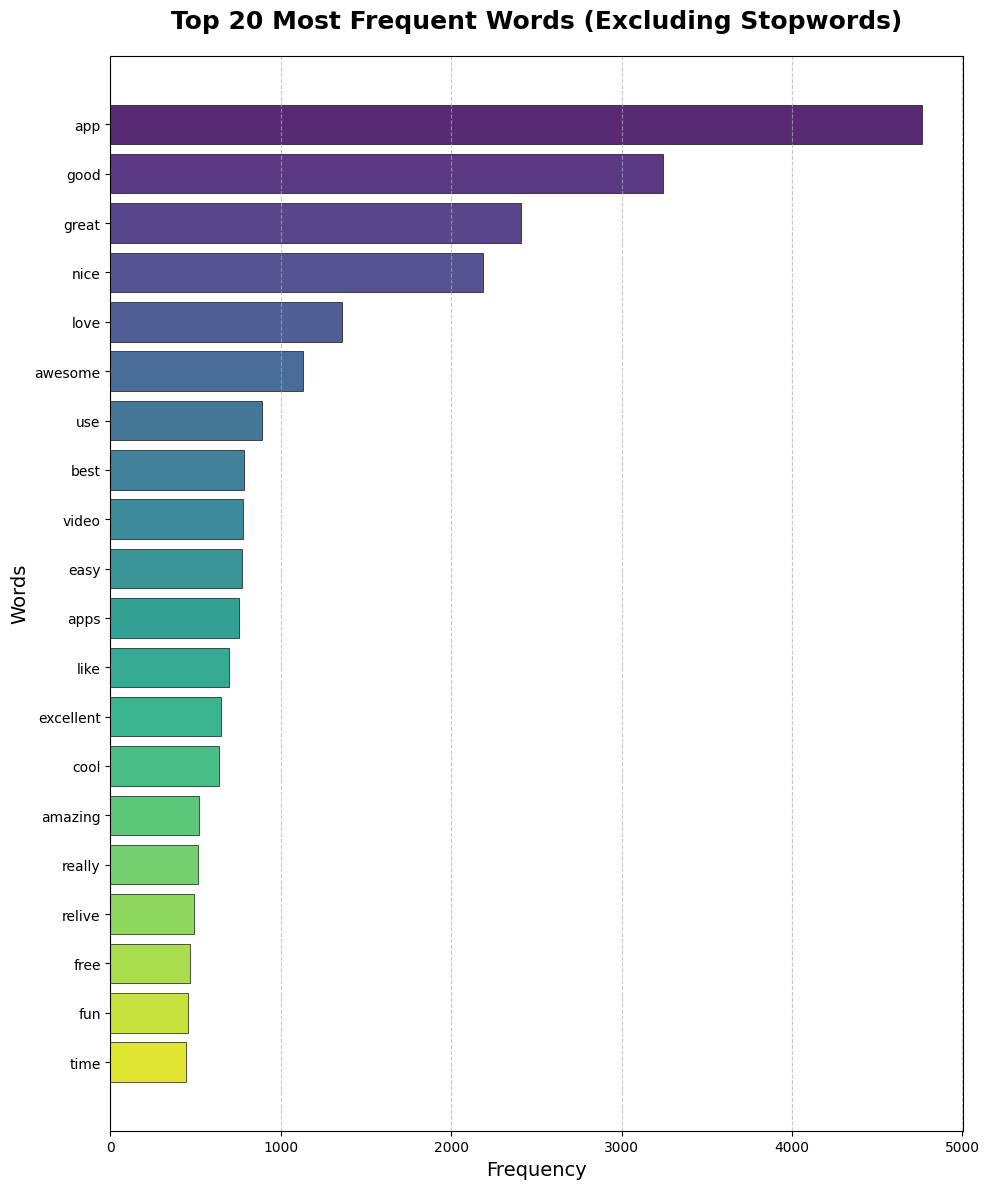

In [32]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

text_column = 'content' # Kolom teks

all_text = ' '.join(df_reliverev[text_column].dropna().astype(str))

# Tokenisasi kata-kata dan hapus stopwords
words = all_text.split()
filtered_words = [word.lower() for word in words if word.lower() not in english_stopwords and word.isalpha()] # word.isalpha() untuk menghilangkan angka/simbol

# Hitung kata-kata yang sering muncul
word_counts = Counter(filtered_words)

# Ambil HANYA 20 kata yang paling umum untuk visualisasi
num_words_to_plot = 20
common_words = word_counts.most_common(num_words_to_plot)

# Konversi ke DataFrame untuk visualisasi yang lebih baik
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# display(word_freq_df)
plt.figure(figsize=(10, num_words_to_plot * 0.6)) # Tinggi figure disesuaikan dengan jumlah kata

plt.barh(word_freq_df['Word'][::-1], word_freq_df['Frequency'][::-1],
         color=sns.color_palette("viridis", num_words_to_plot)[::-1], # Menggunakan palet viridis
         edgecolor='black', # Menambahkan garis tepi hitam pada bar
         linewidth=0.5,
         alpha=0.9) # Sedikit transparansi

# Menambahkan judul plot dan label sumbu
plt.title(f"Top {num_words_to_plot} Most Frequent Words (Excluding Stopwords)",
          fontsize=18, fontweight='bold', pad=20) # Menyesuaikan fontsize dan pad
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Words", fontsize=14)

# Menambahkan gridlines pada sumbu X untuk membantu membaca frekuensi
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mengatur tata letak agar semua elemen pas dalam plot
plt.tight_layout()

# Menampilkan plot
plt.show()


In [34]:
english_stopwords = set(stopwords.words('english'))
custom_stopwords = ["عالی", "garmin", "de", "nya", "la", "n", "u", "guys", "too",
                    "muy", "na", "sangat", "although", "oke", "on", "them", "dan",
                    "e", "yg", "se", "un", "le", "and", "dengan", "tidak", "de", "say", "upload"]
# Gabungkan stopwords bawaan dan custom stopwords
all_stopwords = english_stopwords.union(custom_stopwords)

def remove_stopwords(tokens):
    return [token for token in tokens if token not in all_stopwords]


df_reliverev['removed_stopwords_content'] = df_reliverev['lower_tokenized_content'].apply(remove_stopwords)
df_reliverev[['lower_tokenized_content', 'removed_stopwords_content']]


,lower_tokenized_content,removed_stopwords_content
0,"[good, app, ,, but, i, wish, for, upgrade, in,...","[good, app, ,, wish, upgrade, ui, features, so..."
1,"[accurate, details]","[accurate, details]"
2,"[paid, for, this, last, year, at, 50, %, off, ...","[paid, last, year, 50, %, ,, renewed, @, £32, ..."
3,"[it, 's, a, very, good, application, for, me, ...","['s, good, application, ,, try, folks]"
4,[ohsem],[ohsem]
...,...,...
21616,"[awesome, .., has, all, my, rides]","[awesome, .., rides]"
21617,"[so, far, ,, very, good, .]","[far, ,, good, .]"
21618,"[love, the, app, ., fantastic, ....]","[love, app, ., fantastic, ....]"
21619,"[brilliant, ,, just, what, was, needed, adding...","[brilliant, ,, needed, adding, app, ., nothing..."


In [35]:
print(df_reliverev['lower_tokenized_content'][5000])
print(df_reliverev['removed_stopwords_content'][5000])

['beautiful', 'and', 'helpful', 'app', 'audio', 'options', 'should', 'be', 'more', 'and', 'there', 'shouldnt', 'be', 'any', 'limit', 'for', 'size']
['beautiful', 'helpful', 'app', 'audio', 'options', 'shouldnt', 'limit', 'size']


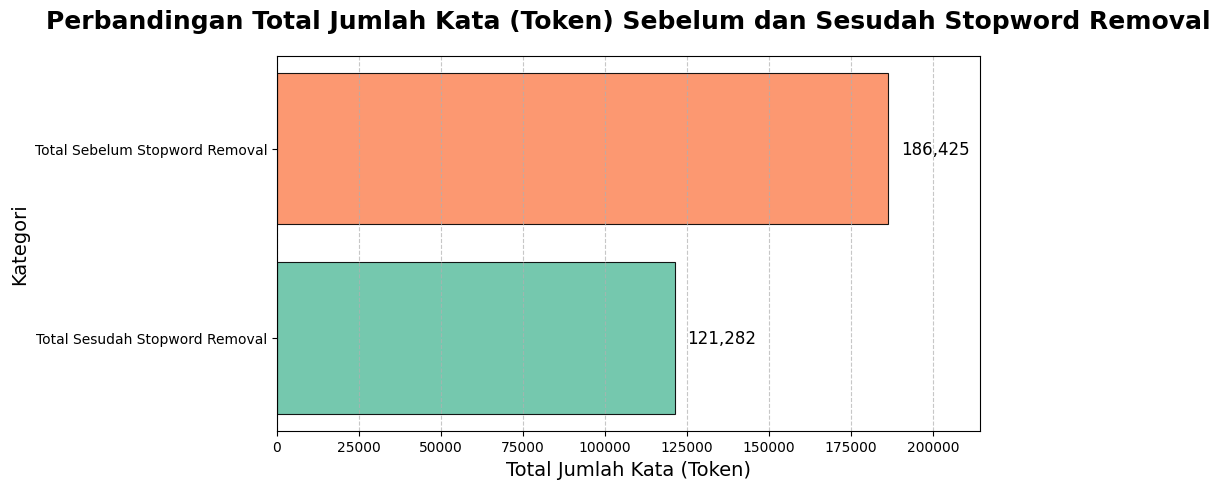

Total jumlah kata sebelum stopword removal: 186,425
Total jumlah kata sesudah stopword removal: 121,282
Total kata yang diremove: 65,143


In [43]:
total_tokens_before = df_reliverev['lower_tokenized_content'].apply(len).sum()
total_tokens_after = df_reliverev['removed_stopwords_content'].apply(len).sum()
total_removed_tokens = total_tokens_before - total_tokens_after

# Create a new DataFrame for horizontal bar chart visualization
df_comparison = pd.DataFrame({
    'Category': ['Total Sesudah Stopword Removal', 'Total Sebelum Stopword Removal'], # 'Sesudah' di bawah, 'Sebelum' di atas
    'Total_Tokens': [total_tokens_after, total_tokens_before] # Data juga dibalik agar sesuai dengan kategori
})

# Visualize using a horizontal bar chart
plt.figure(figsize=(10, 5)) # Appropriate plot size for 2 bars

# Create the horizontal bar chart
colors = sns.color_palette("Set2", 2) # Get two distinct colors from the Set2 palette
colors_for_bars = [colors[0], colors[1]]
bars = plt.barh(df_comparison['Category'], df_comparison['Total_Tokens'],
                color=colors, # Apply the colors to the bars
                edgecolor='black', # Black edge for the bars
                linewidth=0.8,
                alpha=0.9) # Slight transparency for the bars

# Add plot title and axis labels
plt.title('Perbandingan Total Jumlah Kata (Token) Sebelum dan Sesudah Stopword Removal',
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Total Jumlah Kata (Token)', fontsize=14) # X-axis label reflects 'Total Number of Words (Tokens)'
plt.ylabel('Kategori', fontsize=14) # Y-axis label

# Add horizontal gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels on each bar
for bar in bars:
    plt.text(bar.get_width() + (plt.xlim()[1] * 0.02), # Text X-position: end of bar + small offset
             bar.get_y() + bar.get_height()/2, # Text Y-position: vertically centered in the bar
             f'{int(bar.get_width()):,}', # Text value (total tokens), formatted with comma for thousands
             va='center', # Vertical alignment of text
             ha='left', # Horizontal alignment of text
             fontsize=12,
             color='black')

# Adjust X-axis limit to provide some space for labels
plt.xlim(0, max(df_comparison['Total_Tokens']) * 1.15) # Add 15% extra space to the right

# Adjust plot layout
plt.tight_layout()

# Display the plot
plt.show()

# Print the total token counts to console
print(f"Total jumlah kata sebelum stopword removal: {total_tokens_before:,}")
print(f"Total jumlah kata sesudah stopword removal: {total_tokens_after:,}")
print(f"Total kata yang diremove: {total_removed_tokens:,}")


##Lemmatization

In [45]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

df_reliverev['lemmatized_content'] = df_reliverev['removed_stopwords_content'].apply(lemmatize_text)
df_reliverev[['removed_stopwords_content', 'lemmatized_content']]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,removed_stopwords_content,lemmatized_content
0,"[good, app, ,, wish, upgrade, ui, features, so...","[good, app, ,, wish, upgrade, ui, feature, soo..."
1,"[accurate, details]","[accurate, detail]"
2,"[paid, last, year, 50, %, ,, renewed, @, £32, ...","[paid, last, year, 50, %, ,, renewed, @, £32, ..."
3,"['s, good, application, ,, try, folks]","['s, good, application, ,, try, folk]"
4,[ohsem],[ohsem]
...,...,...
21616,"[awesome, .., rides]","[awesome, .., ride]"
21617,"[far, ,, good, .]","[far, ,, good, .]"
21618,"[love, app, ., fantastic, ....]","[love, app, ., fantastic, ....]"
21619,"[brilliant, ,, needed, adding, app, ., nothing...","[brilliant, ,, needed, adding, app, ., nothing..."


In [46]:
print(df_reliverev['removed_stopwords_content'][1])
print(df_reliverev['lemmatized_content'][1])

['accurate', 'details']
['accurate', 'detail']


##Stemming

In [47]:
import nltk
from nltk.stem import PorterStemmer

nltk.download('punkt')

stemmer = PorterStemmer()

def stem_text(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

df_reliverev['stemmed_content'] = df_reliverev['lemmatized_content'].apply(stem_text)
df_reliverev[['lemmatized_content', 'stemmed_content']]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,lemmatized_content,stemmed_content
0,"[good, app, ,, wish, upgrade, ui, feature, soo...","[good, app, ,, wish, upgrad, ui, featur, soon, .]"
1,"[accurate, detail]","[accur, detail]"
2,"[paid, last, year, 50, %, ,, renewed, @, £32, ...","[paid, last, year, 50, %, ,, renew, @, £32, wa..."
3,"['s, good, application, ,, try, folk]","['s, good, applic, ,, tri, folk]"
4,[ohsem],[ohsem]
...,...,...
21616,"[awesome, .., ride]","[awesom, .., ride]"
21617,"[far, ,, good, .]","[far, ,, good, .]"
21618,"[love, app, ., fantastic, ....]","[love, app, ., fantast, ....]"
21619,"[brilliant, ,, needed, adding, app, ., nothing...","[brilliant, ,, need, ad, app, ., noth, prais, ..."


In [48]:
print(df_reliverev['lemmatized_content'][21619])
print(df_reliverev['stemmed_content'][21619])

['brilliant', ',', 'needed', 'adding', 'app', '.', 'nothing', 'praise', 'team', 'relive', '.', 'thanks', ',', 'onward', 'upward', '!', '!']
['brilliant', ',', 'need', 'ad', 'app', '.', 'noth', 'prais', 'team', 'reliv', '.', 'thank', ',', 'onward', 'upward', '!', '!']


##Punctuation Removal

In [49]:
import string

def remove_punctuation(text):
    if isinstance(text, str):
        translator = str.maketrans('', '', string.punctuation)
        cleaned_text = text.translate(translator)
        return cleaned_text
    else:
        return text

df_reliverev['stemmed_content'] = df_reliverev['stemmed_content'].astype(str)
df_reliverev['cleaned_content'] = df_reliverev['stemmed_content'].apply(remove_punctuation)
df_reliverev[['stemmed_content', 'cleaned_content']]

,stemmed_content,cleaned_content
0,"['good', 'app', ',', 'wish', 'upgrad', 'ui', '...",good app wish upgrad ui featur soon
1,"['accur', 'detail']",accur detail
2,"['paid', 'last', 'year', '50', '%', ',', 'rene...",paid last year 50 renew £32 warn whatsoev r...
3,"[""'s"", 'good', 'applic', ',', 'tri', 'folk']",s good applic tri folk
4,['ohsem'],ohsem
...,...,...
21616,"['awesom', '..', 'ride']",awesom ride
21617,"['far', ',', 'good', '.']",far good
21618,"['love', 'app', '.', 'fantast', '....']",love app fantast
21619,"['brilliant', ',', 'need', 'ad', 'app', '.', '...",brilliant need ad app noth prais team reliv ...


##Expand Contractions

In [50]:
!pip install contractions
import contractions

def expand_contractions(text):
    # Check if the input is a string before attempting to expand contractions
    if isinstance(text, str):
        expanded_text = contractions.fix(text)
        return expanded_text
    else:
        # Return the original value if it's not a string (e.g., NaN)
        return text

# Apply the function to the 'cleaned_content' column
df_reliverev['expanded_cleaned_content'] = df_reliverev['cleaned_content'].apply(expand_contractions)

# Display the DataFrame with the original and expanded columns
df_reliverev[['cleaned_content', 'expanded_cleaned_content']]

,cleaned_content,expanded_cleaned_content
0,good app wish upgrad ui featur soon,good app wish upgrad ui featur soon
1,accur detail,accur detail
2,paid last year 50 renew £32 warn whatsoev r...,paid last year 50 renew £32 warn whatsoev r...
3,s good applic tri folk,s good applic tri folk
4,ohsem,ohsem
...,...,...
21616,awesom ride,awesom ride
21617,far good,far good
21618,love app fantast,love app fantast
21619,brilliant need ad app noth prais team reliv ...,brilliant need ad app noth prais team reliv ...


In [51]:
print(df_reliverev['cleaned_content'][5000])
print(df_reliverev['expanded_cleaned_content'][5000])

beauti help app audio option shouldnt limit size
beauti help app audio option should not limit size


##Spelling Corection

In [52]:
!pip install symspellpy  # Install if not already installed
import pkg_resources
from symspellpy import SymSpell, Verbosity
import nltk
from nltk.tokenize import word_tokenize
import re

# Download resources if not already present
nltk.download('punkt')
nltk.download('popular')

# Load dictionary (adjust paths if necessary)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt"
)
bigram_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_bigramdictionary_en_243_342.txt"
)

# Initialize SymSpell with adjusted parameters
sym_spell = SymSpell(max_dictionary_edit_distance=3, prefix_length=7)  # Increased max_edit_distance
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2)

def enhanced_correct_spelling(text):
    # 1. More aggressive preprocessing
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove non-alphanumeric characters except spaces
    words = word_tokenize(text.lower())  # Tokenize and lowercase

    # 2. Spelling correction with SymSpell
    corrected_words = []
    for word in words:
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=3)  # Increased max_edit_distance here as well
        if suggestions:
            corrected_words.append(suggestions[0].term)
        else:
            corrected_words.append(word)

    corrected_text = " ".join(corrected_words)

    # 3. Context-dependent correction (unchanged)
    suggestions = sym_spell.lookup_compound(corrected_text, max_edit_distance=2)
    if suggestions:
        return suggestions[0].term
    else:
        return corrected_text

# Apply spelling correction to the 'expanded_cleaned_content' column
df_reliverev['spell_corrected_content'] = df_reliverev['expanded_cleaned_content'].astype(str).apply(enhanced_correct_spelling)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading 

In [53]:
df_reliverev[['spell_corrected_content', 'expanded_cleaned_content']]

,spell_corrected_content,expanded_cleaned_content
0,good app wish upgrade i feature soon,good app wish upgrad ui featur soon
1,occur detail,accur detail
2,paid last year renew warn whatsoever refund ac...,paid last year 50 renew £32 warn whatsoev r...
3,a good apply try folk,s good applic tri folk
4,them,ohsem
...,...,...
21616,awesome ride,awesom ride
21617,far good,far good
21618,love app fantast,love app fantast
21619,brilliant need and app not paris team relic th...,brilliant need ad app noth prais team reliv ...


In [54]:
from collections import Counter

def remove_rare_words_from_df(df, column_name, threshold=50):
    # Combine all text data from the specified column into a single string
    all_text = ' '.join(df[column_name].dropna().astype(str))
    words = all_text.split()

    # Count word frequencies
    word_counts = Counter(words)

    # Function to filter rare words from a list of words
    def filter_rare_words(text):
        if isinstance(text, str):
          tokens = text.split()
          filtered_tokens = [word for word in tokens if word_counts[word] > threshold]
          return " ".join(filtered_tokens)
        elif isinstance(text, list):
          filtered_tokens = [word for word in text if word_counts[word] > threshold]
          return filtered_tokens
        else:
          return text

    # Apply the filtering function to the specified column
    df[f'{column_name}_no_rare'] = df[column_name].apply(filter_rare_words)
    return df


# Example usage:
df_reliverev = remove_rare_words_from_df(df_reliverev, 'spell_corrected_content', threshold=50) # Adjust threshold as needed
df_reliverev[['spell_corrected_content', 'spell_corrected_content_no_rare']]


,spell_corrected_content,spell_corrected_content_no_rare
0,good app wish upgrade i feature soon,good app wish upgrade i feature soon
1,occur detail,occur
2,paid last year renew warn whatsoever refund ac...,paid last year refund email absolute
3,a good apply try folk,a good apply try
4,them,
...,...,...
21616,awesome ride,awesome ride
21617,far good,far good
21618,love app fantast,love app fantast
21619,brilliant need and app not paris team relic th...,brilliant need and app not relic thank


##Common Words

In [61]:
from nltk.corpus import stopwords
from nltk.tag import pos_tag
import nltk
import string

# Download stopwords if not already present
nltk.download('stopwords')

# Download the specific tagger resource needed
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')


def remove_common_words_keep_adj(text):
    # Tokenize the text if it's a string
    if isinstance(text, str):
        tokens = text.split()
    else:
        tokens = text  # Assume it's already tokenized if it's not a string

    filtered_tokens = []
    # Define all_stopwords here or ensure it's defined globally before calling this function
    all_stopwords = set(stopwords.words('english')) # Ensure all_stopwords is defined

    for token, tag in pos_tag(tokens):
        if tag.startswith('JJ'):  # Keep adjectives
            filtered_tokens.append(token)
        elif token.lower() not in all_stopwords:
            filtered_tokens.append(token)

    # Join the filtered tokens back into a string if the input was a string
    if isinstance(text, str):
        return " ".join(filtered_tokens)
    else:
        return filtered_tokens

# Apply spelling correction to the 'expanded_cleaned_content' column
df_reliverev['spell_corrected_content_no_rare_no_common'] = df_reliverev['spell_corrected_content_no_rare'].apply(remove_common_words_keep_adj)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [62]:
df_reliverev[['spell_corrected_content_no_rare', 'spell_corrected_content_no_rare_no_common']]

,spell_corrected_content_no_rare,spell_corrected_content_no_rare_no_common
0,good app wish upgrade i feature soon,good app wish upgrade feature soon
1,occur,occur
2,paid last year refund email absolute,paid last year refund email absolute
3,a good apply try,good apply try
4,,
...,...,...
21616,awesome ride,awesome ride
21617,far good,far good
21618,love app fantast,love app fantast
21619,brilliant need and app not relic thank,brilliant need app relic thank


In [70]:
def calculate_word_difference(text1, text2):
  if isinstance(text1, str) and isinstance(text2, str):
    words1 = set(text1.split())
    words2 = set(text2.split())
    return words1.difference(words2)
  else:
    return set()  # Return an empty set if either input is not a string


df_reliverev['word_difference'] = df_reliverev.apply(
    lambda row: calculate_word_difference(
        row['spell_corrected_content_no_rare'],
        row['spell_corrected_content_no_rare_no_common']
    ),
    axis=1
)

# Display the DataFrame with the new 'word_difference' column
df_reliverev[['spell_corrected_content_no_rare', 'spell_corrected_content_no_rare_no_common', 'word_difference']]


,spell_corrected_content_no_rare,spell_corrected_content_no_rare_no_common,word_difference
0,good app wish upgrade i feature soon,good app wish upgrade feature soon,{i}
1,occur,occur,{}
2,paid last year refund email absolute,paid last year refund email absolute,{}
3,a good apply try,good apply try,{a}
4,,,{}
...,...,...,...
21616,awesome ride,awesome ride,{}
21617,far good,far good,{}
21618,love app fantast,love app fantast,{}
21619,brilliant need and app not relic thank,brilliant need app relic thank,"{not, and}"


In [65]:
from collections import Counter

def calculate_total_different_words(df, column_name):
  all_words = []
  for text in df[column_name].dropna():
    if isinstance(text, str):
      all_words.extend(text.split())

  word_counts = Counter(all_words)
  return len(word_counts)

# Example usage:
total_different_words = calculate_total_different_words(df_reliverev, 'spell_corrected_content_no_rare_no_common')
print(f"Total different words in 'spell_corrected_content_no_rare_no_common': {total_different_words}")


Total different words in 'spell_corrected_content_no_rare_no_common': 299


In [67]:
#save df to local
df_reliverev.to_csv('cleandata.csv', index=False)


# To download the file to your local machine:
from google.colab import files
files.download('cleandata.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
#Save to drive
df_reliverev.to_csv('/content/drive/My Drive/Data/df_reliverev_clean', index=False)